#**BUSINESS UNDERSTANDING**

###BUSINESS OBJECTIVE

Tujuan utama dari proyek ini adalah untuk meningkatkan kesehatan ibu di daerah pedesaan Bangladesh dengan menggunakan teknologi berbasis IoT untuk memantau risiko kesehatan ibu hamil secara real-time. Tujuan bisnis ini berkaitan dengan dampak jangka panjang dan pencapaian secara finansial, sosial, dan operasional dari penerapan teknologi pemantauan risiko kesehatan ibu.

###ASSESS SITUATION



Tujuan analitik berfokus pada pemahaman data yang ada, penerapan analisis untuk mendeteksi faktor risiko, serta membuat keputusan berbasis data yang mendukung keputusan klinis. Di banyak daerah pedesaan di Bangladesh, ada keterbatasan akses internet dan teknologi. Meskipun demikian, penggunaan ponsel pintar dan perangkat IoT yang lebih sederhana semakin meningkat, yang memberikan peluang untuk mengembangkan solusi berbasis teknologi. Data yang ada meliputi variabel penting seperti usia, tekanan darah sistolik dan diastolik, gula darah, suhu tubuh, denyut jantung, dan tingkat risiko yang telah dikumpulkan dari rumah sakit dan klinik di daerah pedesaan.


###DATA MINING GOALS

Menilai situasi melibatkan pemahaman kondisi saat ini, tantangan yang ada, dan potensi untuk menerapkan solusi berbasis IoT di daerah pedesaan. Dapat menggunakan data kesehatan yang terkumpul untuk mengidentifikasi pola-pola risiko yang dapat mempengaruhi kesehatan ibu hamil, seperti hipertensi, diabetes gestasional, atau infeksi.

###PROJECT PLAN

Perencanaan proyek bertujuan untuk menyusun langkah-langkah konkret yang harus diambil untuk mengimplementasikan sistem pemantauan risiko kesehatan ibu berbasis IoT. Dengan cara melakukan penelitian dan pengembangan data, pengembangan teknologi IoT, Pilot Projecr, Peluncuran penuh dan penyuluhan,  pemantauan dan evaluasi,penyusunan laporan dan pengukuran dampak.

Dengan langkah-langkah yang jelas dan tujuan yang terukur, proyek ini dapat memberikan dampak yang signifikan dalam menurunkan angka kematian ibu di daerah pedesaan Bangladesh dan dapat disesuaikan untuk diterapkan di wilayah lain yang membutuhkan solusi serupa.

#**DATA PREPARATION**

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/Maternal Health Risk Data Set.csv")

df

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk


## PENGECEKAN STRUKTUR DATA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


## STATISTIK DESKRIPTIF

In [ ]:
df.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


In [ ]:
df.corr(numeric_only=True)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
Age,1.000000,0.416045,0.398026,0.473284,-0.255323,0.079798
SystolicBP,0.416045,1.000000,0.787006,0.425172,-0.286616,-0.023108
DiastolicBP,0.398026,0.787006,1.000000,0.423824,-0.257538,-0.046151
BS,0.473284,0.425172,0.423824,1.000000,-0.103493,0.142867
BodyTemp,-0.255323,-0.286616,-0.257538,-0.103493,1.000000,0.098771
HeartRate,0.079798,-0.023108,-0.046151,0.142867,0.098771,1.000000


## MISSING VALUES


In [ ]:
print((df.isna().sum() / len(df)) * 100)

Age            0.0
SystolicBP     0.0
DiastolicBP    0.0
BS             0.0
BodyTemp       0.0
HeartRate      0.0
RiskLevel      0.0
dtype: float64


Dikarenakan tidak ada kolom atau data yang hilang maupun tidak terbaca, maka tidak diperlukan penanganan missing values.

## DUPLICATED VALUES

In [ ]:
df[df.duplicated()]

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
67,19,120,80,7.0,98.0,70,mid risk
72,19,120,80,7.0,98.0,70,mid risk
97,19,120,80,7.0,98.0,70,mid risk
106,50,140,90,15.0,98.0,90,high risk
107,25,140,100,6.8,98.0,80,high risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk


Dilakukan pengecekan data yang mengalami duplikasi dan dilakukan penanganan dengan cara menghapus duplikasi data.

In [ ]:
df = df.drop_duplicates()

df

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk
...,...,...,...,...,...,...,...
673,12,100,50,6.4,98.0,70,mid risk
674,15,100,60,6.0,98.0,80,low risk
703,15,100,49,7.6,98.0,77,low risk
704,12,100,50,6.0,98.0,70,mid risk


## OUTLIERS

In [ ]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
Age,5.088496
SystolicBP,0.000000
DiastolicBP,0.000000
BS,15.707965
BodyTemp,21.681416
HeartRate,0.221239


Dikarenakan presentasi dari Age dan HeartRate berada di bawah 10% maka dilakukan penanganan, yaitu dengan melakukan imputasi.

In [ ]:
columns_to_impute = ["Age", "HeartRate"]

for col in columns_to_impute:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Menggunakan .loc[] agar tidak muncul SettingWithCopyWarning
    df.loc[:, col] = df[col].clip(lower=lower_bound, upper=upper_bound)

In [ ]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
Age,0.000000
SystolicBP,0.000000
DiastolicBP,0.000000
BS,15.707965
BodyTemp,21.681416
HeartRate,0.000000


In [ ]:
df

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk
...,...,...,...,...,...,...,...
673,12,100,50,6.4,98.0,70,mid risk
674,15,100,60,6.0,98.0,80,low risk
703,15,100,49,7.6,98.0,77,low risk
704,12,100,50,6.0,98.0,70,mid risk


## INCOSISTENT VALUES

Tidak perlu dilakukan penanganan pada data.

## CONSTRUCT DATA

In [ ]:
print(df.head())

   Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel
0   25         130           80  15.0      98.0         86  high risk
1   35         140           90  13.0      98.0         70  high risk
2   29          90           70   8.0     100.0         80  high risk
3   30         140           85   7.0      98.0         70  high risk
4   35         120           60   6.1      98.0         76   low risk


Kita bisa menggunakan kolom SystolicBP, DiastolicBP, dan BS untuk mengklasifikasikan risiko kesehatan. Kita dapat membuat kolom RiskClass berdasarkan kombinasi tekanan darah dan kadar gula darah (BS).

In [ ]:
# Menambahkan kolom BPStatus (status tekanan darah)
def classify_bp(systolic, diastolic):
    if systolic > 140 or diastolic > 90:
        return "High BP"
    elif systolic < 90 or diastolic < 60:
        return "Low BP"
    else:
        return "Normal"

df.loc[:, 'BPStatus'] = df.apply(lambda row: classify_bp(row['SystolicBP'], row['DiastolicBP']), axis=1)

# Klasifikasi Risiko Berdasarkan Tekanan Darah
def classify_bp(systolic, diastolic):
    if systolic >= 140 or diastolic >= 90:
        return "Hypertension"
    elif 120 <= systolic <= 139 or 80 <= diastolic <= 89:
        return "Prehypertension"
    else:
        return "Normal"

# Klasifikasi Risiko Berdasarkan Gula Darah
def classify_bs(bs):
    if bs >= 7:
        return "High BS"
    else:
        return "Normal BS"

# Pastikan menggunakan .loc untuk menghindari SettingWithCopyWarning
df.loc[:, 'BPClass'] = df.apply(lambda row: classify_bp(row['SystolicBP'], row['DiastolicBP']), axis=1)
df.loc[:, 'BSClass'] = df.apply(lambda row: classify_bs(row['BS']), axis=1)

# Menambahkan kolom gabungan untuk Risiko Kesehatan
def overall_risk(row):
    if row['BPClass'] == 'Hypertension' or row['BSClass'] == 'High BS':
        return 'High Risk'
    elif row['BPClass'] == 'Prehypertension' or row['BSClass'] == 'Normal BS':
        return 'Moderate Risk'
    else:
        return 'Low Risk'

df.loc[:, 'RiskClass'] = df.apply(overall_risk, axis=1)


print(df.head())

   Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel  \
0   25         130           80  15.0      98.0         86  high risk   
1   35         140           90  13.0      98.0         70  high risk   
2   29          90           70   8.0     100.0         80  high risk   
3   30         140           85   7.0      98.0         70  high risk   
4   35         120           60   6.1      98.0         76   low risk   

  BPStatus          BPClass    BSClass      RiskClass  
0   Normal  Prehypertension    High BS      High Risk  
1   Normal     Hypertension    High BS      High Risk  
2   Normal           Normal    High BS      High Risk  
3   Normal     Hypertension    High BS      High Risk  
4   Normal  Prehypertension  Normal BS  Moderate Risk  


## DATA REDUCTION

Setelah proses pengklasifikasian, kolom Age dan BodyTemp dihapus, karena tidak relevan dengan pemantauan risiko kesehatan berdasarkan tekanan darah dan gula darah. Hanya kolom yang berhubungan langsung dengan kesehatan ibu yang dipertahankan.

In [ ]:
# Menghapus kolom yang tidak relevan untuk analisis risiko
df_reduced = df.drop(columns=['Age', 'BodyTemp'])

# Menampilkan DataFrame setelah reduksi
df_reduced

,SystolicBP,DiastolicBP,BS,HeartRate,RiskLevel,BPStatus,BPClass,BSClass,RiskClass
0,130,80,15.0,86,high risk,Normal,Prehypertension,High BS,High Risk
1,140,90,13.0,70,high risk,Normal,Hypertension,High BS,High Risk
2,90,70,8.0,80,high risk,Normal,Normal,High BS,High Risk
3,140,85,7.0,70,high risk,Normal,Hypertension,High BS,High Risk
4,120,60,6.1,76,low risk,Normal,Prehypertension,Normal BS,Moderate Risk
...,...,...,...,...,...,...,...,...,...
673,100,50,6.4,70,mid risk,Low BP,Normal,Normal BS,Moderate Risk
674,100,60,6.0,80,low risk,Normal,Normal,Normal BS,Moderate Risk
703,100,49,7.6,77,low risk,Low BP,Normal,High BS,High Risk
704,100,50,6.0,70,mid risk,Low BP,Normal,Normal BS,Moderate Risk


Kode ini bertujuan untuk menghapus baris dengan HeartRate = 7 yang mungkin dianggap sebagai nilai yang tidak relevan atau sebagai outlier, dan kemudian memverifikasi apakah nilai tersebut telah berhasil dihapus dengan melihat distribusi nilai HeartRate yang tersisa.

In [ ]:
import pandas as pd

# Misalnya 'df' adalah DataFrame yang berisi data Anda
df = df[df['HeartRate'] != 7]

# Cek apakah data dengan HeartRate == 7 sudah terhapus
print(df['HeartRate'].value_counts())


HeartRate
70    271
76    131
80    117
77     96
66     87
60     74
88     59
86     55
78     46
90     19
82     19
75     19
67     12
65      5
68      2
Name: count, dtype: int64


#**VISUALISASI DATA**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##Bar Chart

In [ ]:
df['RiskLevel'].value_counts()

,count
RiskLevel,
low risk,404
mid risk,336
high risk,272


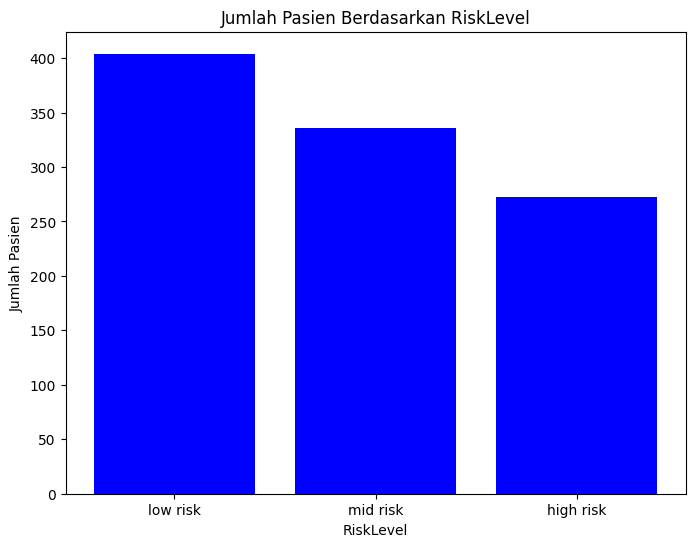

In [ ]:
plt.figure(figsize=(8, 6))
plt.bar(df['RiskLevel'].value_counts().index, df['RiskLevel'].value_counts().values, color='blue')
plt.title('Jumlah Pasien Berdasarkan RiskLevel')
plt.xlabel('RiskLevel')
plt.ylabel('Jumlah Pasien')
plt.xticks(rotation=0)
plt.show()

Insight: Proporsi Pasien Berisiko Rendah (Low Risk) Cukup Besar

'Low Risk' menunjukkan proporsi yang signifikan, ini berarti bahwa banyak pasien yang memiliki kondisi kesehatan yang relatif baik atau tidak memiliki faktor risiko signifikan.

Tindakan:
- menjaga kesehatan yang stabil = fokus pada mempertahankan gaya hidup yang sehat bagi pasien dalam kategori ini
- pengurangan beban pada sistem kesehatan = mengarahkan lebih banyak sumber daya untuk mendukung pasien berisiko tinggi, sementara pasien dengan risiko rendah dapat dikelola dengan cara yang lebih ringan atau preventif

##Line Chart

In [ ]:
df.groupby('HeartRate').size()

,0
HeartRate,
7,2
60,74
65,5
66,87
67,12
68,2
70,271
75,19
76,131


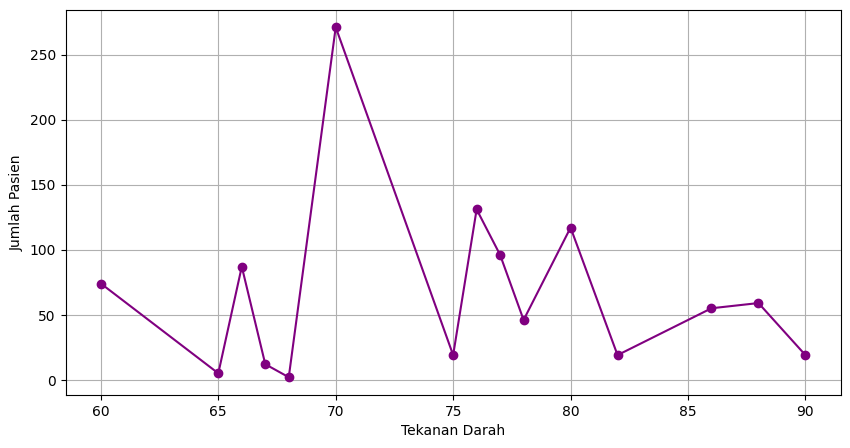

In [ ]:
df_visits_per_day = df.groupby('HeartRate').size()
plt.figure(figsize=(10, 5))
plt.plot(df_visits_per_day.index, df_visits_per_day.values, marker='o', color='purple')
plt.title('')
plt.xlabel('Tekanan Darah')
plt.ylabel('Jumlah Pasien')
plt.grid()
plt.show()

Insight:

visualisasi ini akn memberikan gambaran tentang bagaimana jumlah pasien terdistribusi berdasarkan detak jantung mereka. Detak jantung 70 dianggap sebagai nilai normal  yang sering terjadi pada pasien dalam data ini. Ini sesuai dengan pedoman medis, dimana detak jantung 60-100 bpm sering dianggap sebagai rentang normal bagi orang dewasa dalam keadaan istirahat.

Tindakan:
- perlu dilakukan pemeriksaan lebih lanjut terhadap distribusi detak jantung lainnya untuk melihat apakah ada masalah seperti detak jantung yang terlalu rendah
- memonitor apakah ada kelainan dalam distribusi detak jantung pasien yang memerlukan perhatian khusus

In [ ]:
df.groupby('SystolicBP').size()

,0
SystolicBP,
70,7
75,8
76,16
78,3
80,5
83,2
85,43
90,154
95,12


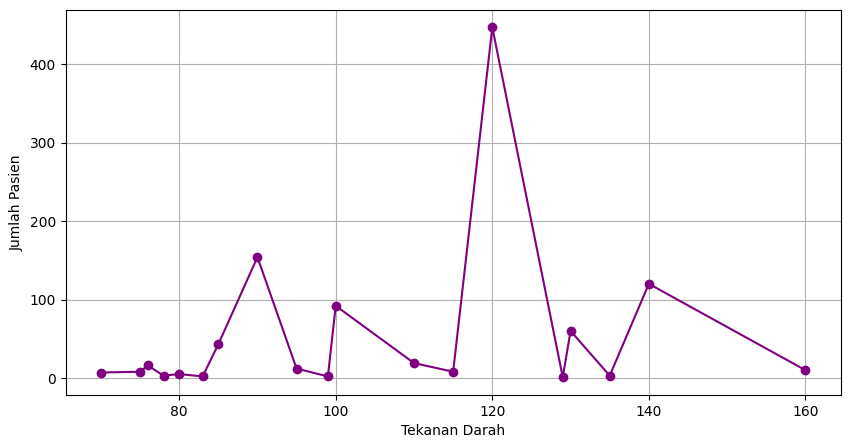

In [ ]:
df_visits_per_day = df.groupby('SystolicBP').size()
plt.figure(figsize=(10, 5))
plt.plot(df_visits_per_day.index, df_visits_per_day.values, marker='o', color='purple')
plt.title('')
plt.xlabel('Tekanan Darah')
plt.ylabel('Jumlah Pasien')
plt.grid()
plt.show()

insight:

mayoritas  pasien memiliki tekanan darah 120 mmHg, ini bisa menandakan bahwa populasi yang diamati cenderung dalam kondisi kesehatan yang baik, dengan tidak banyak masalah terkait hipertensi atau masalah janutng.

tindakan:
- penting utnuk memantau pasien secara rutin, terutama jika mereka memiliki faktor risiko lain untuk hipertensi
- melakukan pemeriksaan lebih lanjut terhadap faktor-faktor lain yang dapat mempengaruhi kesehatan jantung dan pembuluh darah
- meningkatkan kesadaran akan gaya hidup sehat dan pencegahan penyakit jantung di antara populasi pasien yang lebih luas

##Heatmap

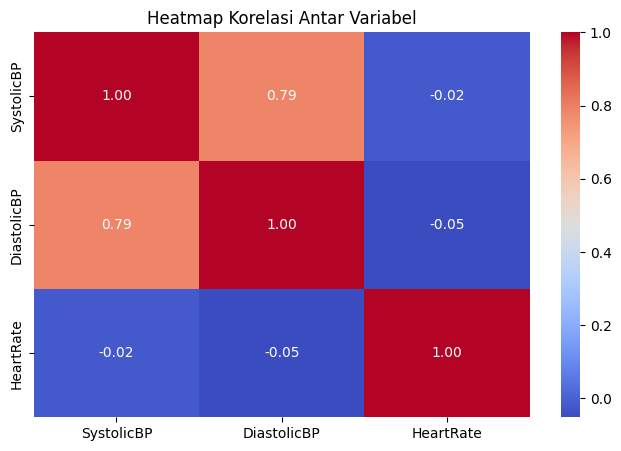

In [ ]:
plt.figure(figsize=(8, 5))
sns.heatmap(df[['SystolicBP', 'DiastolicBP', 'HeartRate']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi Antar Variabel')
plt.show()

Insight:

Tekanan darah sistolik dan diastolik biasanya memiliki korelasi positif yang cukup  kuat, karena keduanya sering berhubungan dengan kondisi jantung secara bersamaan

##Pie Chart

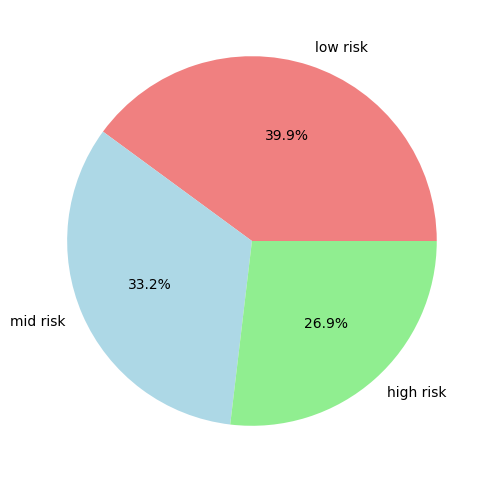

In [ ]:
plt.figure(figsize=(6, 6))
plt.pie(df['RiskLevel'].value_counts(), labels=df['RiskLevel'].value_counts().index, autopct='%1.1f%%', colors=['lightcoral', 'lightblue', 'lightgreen'])
plt.title('')
plt.show()

Insight:

menunjukkan bahwa populasi ini secara umum memiliki kondisi kesehatan yang lebih baik dan mungkin memerlukan lebih sedikit perhatian medis intensif

Tindakan:
penting untuk menjaga status mereka dengan edukasi kesehatan berkelanjutan dan pemantauan sesekali untuk mencegah perubahan yang tidak diinginkan dalam kondisi mereka

##Box Plot

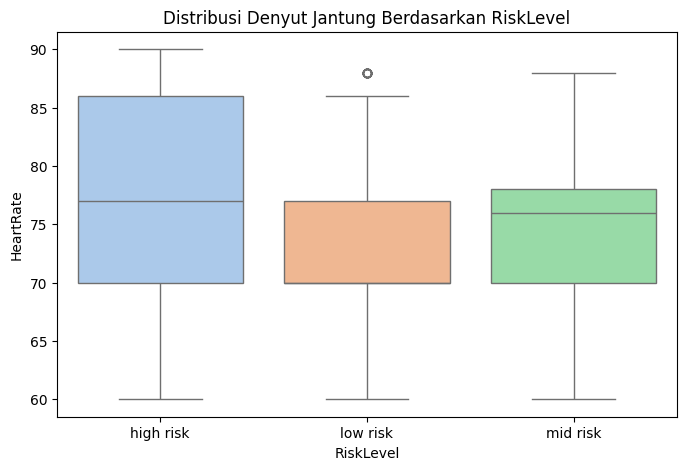

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='RiskLevel', y='HeartRate',hue="RiskLevel" , data=df, palette='pastel')
plt.title('Distribusi Denyut Jantung Berdasarkan RiskLevel')
plt.xlabel('RiskLevel')
plt.ylabel('HeartRate')
plt.xticks(rotation=0)
plt.show()

Insight:

- Kelompok high risk, memiliki denyut jantung yang cenderung lebih tinggi dan tidak stabil bisa menjadi sinyal risiko masalah kardiovaskular
- kelompok low risk, menunjukkan denyut jantung cenderung normal dan terkkontrol
- Kelompok mid risk, masih cukup banyak variasi sehingga perlu pemantauan lebih lanjut

Tindakan:
- untuk kelompok high risk = pemantauan ketat terhadap denyut jantung secara rutin, pemeriksaan medis lanjutan untuk mendeteksi potensi penyakit jantung
- untuk kelompok low risk = edukasi untuk memmpertahankan kondisi stabil, pemantauan ringan
- untuk kelompok mid risk = edukasi kesehatan terkait pentinngnya menjaga denyut jantung norrmal, pemantauan berkala

##Scatter Plot

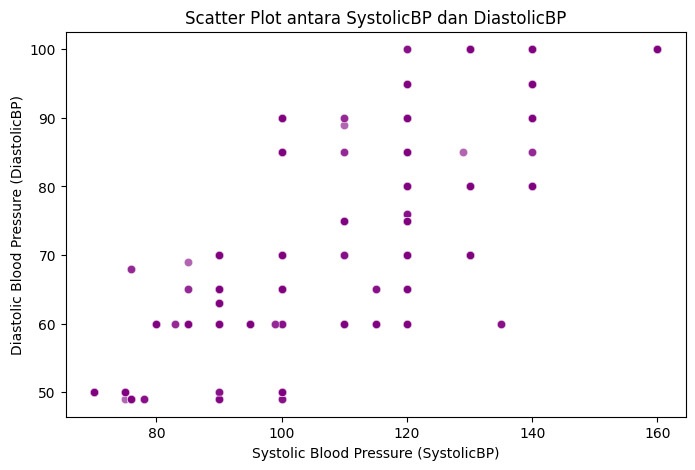

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='SystolicBP', y='DiastolicBP', data=df, color='purple', alpha=0.6)
plt.title('Scatter Plot antara SystolicBP dan DiastolicBP')
plt.xlabel('Systolic Blood Pressure (SystolicBP)')
plt.ylabel('Diastolic Blood Pressure (DiastolicBP)')
plt.show()

Insight:
- hubungan systolicBP dan diastolicBP = terlihat ada korelasi positif antara tekanan darah sistolik dan diastolik meskipun tidak sepenuhnya linear, semakin tinggi systolicBP cenderung diastolicBP juga meningkat
- outlier = ada titik yang jauh lebih tinggi yang berpotensi sebagai risiko tinggi

Tindakan:
- pemeriksaan lanjutan untuk mengonfirmasi hipertensi
- evaluasi medis untuk penyebab hipotensi
- skrining rutin tekanan darah di komunitas untuk deteksi dini